_________________________________________________________________________________________________________
## BASIC CERTIFICATION COURSE IN ARTIFICIAL INTELLIGENCE 
----------------------------------------------------------------------------------------------------
### Case Study 1 - Analysis of Treatment Quality and Efficiency of Hospitals 

----------------------------------------------------------------------------------------------------
Submitted by - Hitesh Dhawan

**Case Study 1:**
Analysis of Treatment Quality and Efficiency of Hospitals

**Source:** Journal of Health and Medical Sciences, Authored by Viju Raghupathi and Wullianallur
Raghupathi, School of Business, Brooklyn College, City University of Newyork, USA.

**Problem Statement:** The Objective of this research is to escalate the health care expenditure and the
number of hospitalizations.

**Data Source**: The health data for the study was extracted from the Statewide Planning and Research
Cooperative System (SPARCS) of the New York State Department of Health (NYSDOH). We extracted
200,000 patient records for the period 2009 to 2012. Data from such a large dataset is naturally
characterized by a degree of incompleteness and fuzziness. The data includes the hospitalization
indicators such as **facility ID, procedure description, type of admission, patient disposition upon
discharge, APR severity of illness, source of payment, and age group.** The indicators for treatment result
include length of stay and APR risk :


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

In [160]:
data = pd.read_csv('sparcs1.csv')
print(data.columns)


Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Age Group',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Procedure Description', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'Source of Payment 1', 'Total Costs'],
      dtype='object')


In [161]:
data.shape

(19999, 13)

In [162]:
data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company,"1,685.18"
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company,"17,394.94"
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross,"1,818.44"
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross,"1,024.48"
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay,"3,238.19"


In [163]:
data.tail()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
19994,New York City,Manhattan,7002024.0,1456.0,0 to 17,4,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company,"1,797.39"
19995,New York City,Manhattan,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OTHER THERAPEUTIC PRCS,1,Minor,Blue Cross,922.71
19996,New York City,Manhattan,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company,916.56
19997,New York City,Manhattan,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company,900.12
19998,New York City,Manhattan,7002024.0,1456.0,0 to 17,1,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company,466.94


In [164]:
data.sample(5)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
5751,New York City,Manhattan,7002054.0,1458.0,0 to 17,1,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross,"1,005.54"
18168,New York City,Manhattan,7002002.0,1439.0,0 to 17,1,Newborn,Home or Self Care,NO PROC,1,Minor,Insurance Company,896.21
16751,New York City,Manhattan,7002054.0,1464.0,0 to 17,1,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company,"1,168.02"
2833,New York City,Manhattan,7002054.0,3975.0,0 to 17,3,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,1,Minor,Insurance Company,"2,217.19"
18468,New York City,Manhattan,7002017.0,1450.0,0 to 17,3,Emergency,Home or Self Care,FETAL MONITORING,2,Minor,Self-Pay,"4,357.69"


In [165]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,19994.0,6.968105e+06,361111.424700,101000.0,7002017.0,7002032.0,7002054.0,7004010.0
Facility ID,19994.0,1.574881e+03,570.057810,1.0,1450.0,1458.0,1464.0,3975.0
APR Severity of Illness Code,19999.0,1.382419e+00,0.669259,0.0,1.0,1.0,2.0,4.0


In [166]:
data.drop(['Total Costs'], axis = 1, inplace = True)
data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [167]:
data.drop(['Hospital County'], axis = 1, inplace = True)
data.head()

,Health Service Area,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [168]:
data.drop(['Operating Certificate Number'], axis = 1, inplace = True)
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [169]:
print("dimension of sparcs data: {}".format(data.shape))

dimension of sparcs data: (19999, 10)


In [170]:
data.isnull().sum()

Health Service Area             5
Facility ID                     5
Age Group                       0
Length of Stay                  0
Type of Admission               0
Patient Disposition             4
CCS Procedure Description       0
APR Severity of Illness Code    0
APR Risk of Mortality           3
Source of Payment 1             0
dtype: int64

In [171]:
data = data.dropna(subset=['Health Service Area','APR Risk of Mortality','Facility ID','Patient Disposition'])

In [172]:
data.isnull().sum()

Health Service Area             0
Facility ID                     0
Age Group                       0
Length of Stay                  0
Type of Admission               0
Patient Disposition             0
CCS Procedure Description       0
APR Severity of Illness Code    0
APR Risk of Mortality           0
Source of Payment 1             0
dtype: int64

In [173]:
print(data.groupby('APR Severity of Illness Code').size())

APR Severity of Illness Code
1    14192
2     4206
3     1327
4      262
dtype: int64


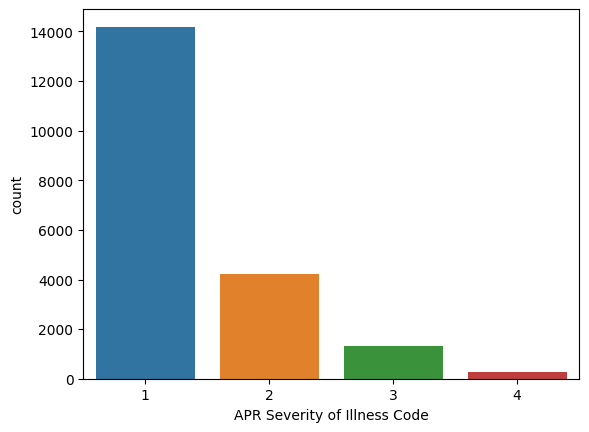

In [174]:
import seaborn as sns
sns.countplot(data=data, x='APR Severity of Illness Code', label='Illness Code Count')
plt.show()

In [175]:
data.shape

(19987, 10)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19987 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Health Service Area           19987 non-null  object 
 1   Facility ID                   19987 non-null  float64
 2   Age Group                     19987 non-null  object 
 3   Length of Stay                19987 non-null  object 
 4   Type of Admission             19987 non-null  object 
 5   Patient Disposition           19987 non-null  object 
 6   CCS Procedure Description     19987 non-null  object 
 7   APR Severity of Illness Code  19987 non-null  int64  
 8   APR Risk of Mortality         19987 non-null  object 
 9   Source of Payment 1           19987 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [177]:
data.apply(lambda cols : cols.unique() )

Health Service Area             [New York City, Southern Tier, Hudson Valley, ...
Facility ID                     [1458.0, 1464.0, 977.0, 1176.0, 1302.0, 1306.0...
Age Group                       [0 to 17, 18 to 29, 30 to 49, 70 or Older, 50 ...
Length of Stay                  [2, 4, 3, 15, 1, 35, 5, 8, 6, 16, 7, 23, 11, 2...
Type of Admission               [Newborn, Emergency, Elective, Urgent, Not Ava...
Patient Disposition             [Home or Self Care, Cancer Center or Children'...
CCS Procedure Description       [CIRCUMCISION, RESP INTUB/MECH VENTIL, OPHTHAL...
APR Severity of Illness Code                                         [1, 2, 3, 4]
APR Risk of Mortality                           [Minor, Major, Moderate, Extreme]
Source of Payment 1             [Insurance Company, Blue Cross, Self-Pay, Medi...
dtype: object

In [178]:
data.shape

(19987, 10)

In [179]:
data[data['Health Service Area']=='nan']

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1


In [180]:
(data["Type of Admission"])

0          Newborn
1        Emergency
2          Newborn
3          Newborn
4        Emergency
           ...    
19994      Newborn
19995      Newborn
19996      Newborn
19997      Newborn
19998      Newborn
Name: Type of Admission, Length: 19987, dtype: object

In [181]:
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


### we need to change from string to int by using label encoder

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19987 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Health Service Area           19987 non-null  object 
 1   Facility ID                   19987 non-null  float64
 2   Age Group                     19987 non-null  object 
 3   Length of Stay                19987 non-null  object 
 4   Type of Admission             19987 non-null  object 
 5   Patient Disposition           19987 non-null  object 
 6   CCS Procedure Description     19987 non-null  object 
 7   APR Severity of Illness Code  19987 non-null  int64  
 8   APR Risk of Mortality         19987 non-null  object 
 9   Source of Payment 1           19987 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [183]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Age Group"]=le.fit_transform(data['Age Group'])

In [184]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Length of Stay"]=le.fit_transform(data["Length of Stay"])

In [185]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Type of Admission"]=le.fit_transform(data["Type of Admission"])

In [186]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Patient Disposition"]=le.fit_transform(data["Patient Disposition"])

In [187]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["CCS Procedure Description"]=le.fit_transform(data["CCS Procedure Description"])

In [188]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["APR Severity of Illness Code"]=le.fit_transform(data["APR Severity of Illness Code"])

In [189]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["APR Risk of Mortality"]=le.fit_transform(data["APR Risk of Mortality"])

In [191]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Health Service Area"]=le.fit_transform(data["Health Service Area"])

In [192]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Source of Payment 1"]=le.fit_transform(data["Source of Payment 1"])

### print("Here, all encoded values in the data for fitting the model")

In [193]:
data.head()


,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,4,1458.0,0,20,2,5,22,0,2,2
1,4,1458.0,0,42,1,1,171,1,1,2
2,4,1464.0,0,20,2,5,94,0,2,0
3,5,977.0,0,20,2,5,163,1,2,0
4,4,1176.0,0,31,1,5,32,1,2,7


## Split the dataset for train model

In [194]:
X = data.drop(['Type of Admission'],axis = 1)# independant variable
y = data['Type of Admission'] # dependant variable or target variable

In [195]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =38)


In [196]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("----------------------------------------")
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (15989, 9)
Shape of X_test:  (3998, 9)
----------------------------------------
Shape of y_train:  (15989,)
Shape of y_test:  (3998,)


In [197]:
X_train.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
3368,4,1439.0,0,20,5,91,0,2,2
5505,4,1458.0,0,0,5,97,0,2,2
17534,4,3975.0,0,31,5,94,0,2,2
2250,4,1464.0,0,20,5,163,0,2,3
552,4,1178.0,2,0,5,91,1,2,3


In [199]:
y_train.head()

3368     2
5505     1
17534    2
2250     2
552      4
Name: Type of Admission, dtype: int64

In [198]:
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,4,1458.0,0,20,2,5,22,0,2,2
1,4,1458.0,0,42,1,1,171,1,1,2
2,4,1464.0,0,20,2,5,94,0,2,0
3,5,977.0,0,20,2,5,163,1,2,0
4,4,1176.0,0,31,1,5,32,1,2,7


### 1. Logistic Regression


In [200]:
from sklearn.linear_model import LogisticRegression

#Crating A logisticRegression Object
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# calculate accuracy#
print("Training set accuracy: {:.3f}".format(logmodel.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logmodel.score(X_test, y_test)))
print()

Training set accuracy: 0.641
Test set accuracy: 0.640



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Linear Model

In [201]:
from sklearn import linear_model

#Crating A linear Regression Object
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

# calculate accuracy#
print("Linear Regression:Training set accuracy: {:.3f}".format(lin_reg.score(X_train, y_train)))
print("Linear Regression:Test set accuracy: {:.3f}".format(lin_reg.score(X_test, y_test)))

Linear Regression:Training set accuracy: 0.099
Linear Regression:Test set accuracy: 0.097


### Decsion Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.879


In [203]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.699
Accuracy on test set: 0.697


### Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.513
Accuracy on test set: 0.512


In [205]:
y_pred =logmodel.predict(X_test)

In [206]:
y_pred[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [207]:
# predict model using Decision Tree
dtr_y_pred =tree.predict(X_test)

In [208]:
dtr_y_pred[:20]

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2])

In [209]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [210]:
from sklearn.metrics import confusion_matrix, classification_report

In [211]:
confusion_matrix(y_test,y_pred)

array([[   0,    5,  258,    0],
       [   0,   15, 1073,    0],
       [   0,    3, 2544,    0],
       [   0,    2,   98,    0]])

In [212]:
confusion_matrix(y_test,dtr_y_pred)

array([[  78,   85,  100,    0],
       [  77,  284,  727,    0],
       [   0,  122, 2425,    0],
       [  27,   16,   57,    0]])

In [213]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.60      0.01      0.03      1088
           2       0.64      1.00      0.78      2547
           4       0.00      0.00      0.00       100

    accuracy                           0.64      3998
   macro avg       0.31      0.25      0.20      3998
weighted avg       0.57      0.64      0.50      3998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f\n" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.63



Feature importance in Decision trees

In [215]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.04507076 0.43096495 0.52396429 0.         0.
 0.         0.         0.        ]


## Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.885


In [217]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.728
Accuracy on test set: 0.726


### KNN Algorithm

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Type of Admission'], data['Type of Admission'],stratify=data['Type of Admission'], random_state=66)


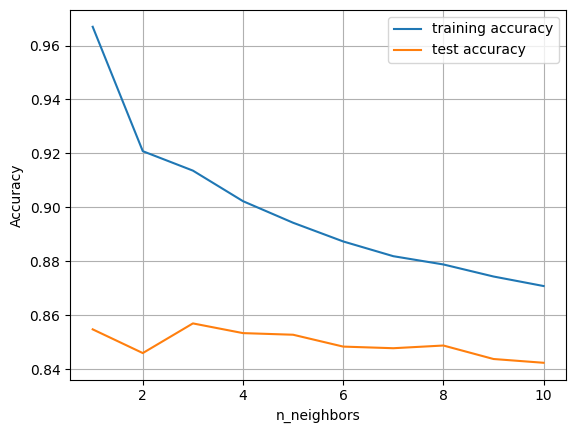

In [219]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid(True)
plt.savefig('knn_compare_model')

### SVM = Support Vector Machine


In [220]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.64


In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


In [222]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.523


### Neural Network

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47, stratify=y)

In [224]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [225]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [226]:
(X_train.shape,y_train.shape)

((15989, 9), (15989,))

In [227]:
print(X_train)

[[0.66666667 0.36663312 0.         ... 0.         0.66666667 0.        ]
 [0.66666667 0.3686462  0.         ... 0.33333333 1.         0.25      ]
 [0.66666667 0.36789129 0.         ... 0.         0.66666667 0.25      ]
 ...
 [0.66666667 0.3616004  0.         ... 0.         0.66666667 0.25      ]
 [0.66666667 0.36663312 0.         ... 0.33333333 0.66666667 0.        ]
 [0.66666667 0.36990438 0.         ... 0.         0.66666667 0.25      ]]


In [228]:
import tensorflow as tf
from keras.models import Sequential # It is linear stack of layers)
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [229]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape=(X_train.shape[1], )),   #
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [230]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(9, 4) dtype=float32, numpy=
 array([[-0.18563026,  0.14933103, -0.28566283,  0.03486043],
        [-0.3135644 , -0.63520837, -0.47725534, -0.52336824],
        [ 0.4634434 , -0.00390875,  0.5874306 , -0.51483285],
        [-0.23275337,  0.57282996, -0.39077863, -0.02931136],
        [ 0.10573763, -0.00880277, -0.6527098 ,  0.24600863],
        [ 0.13691527,  0.30286926, -0.2719061 ,  0.18815804],
        [ 0.12580729, -0.65704274,  0.54211664, -0.14502347],
        [-0.44194686,  0.58766913,  0.23133385,  0.42943347],
        [ 0.6174232 , -0.16269433, -0.34600398,  0.4069233 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.71273077],
        [ 1.0901151 ],
        [ 0.2434125 ],
        [-0.15948647]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0

In [231]:
# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [232]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: -1.3502 - accuracy: 0.2724 - val_loss: -0.2048 - val_accuracy: 0.2729
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: -6.0415 - accuracy: 0.2728 - val_loss: -2203.5713 - val_accuracy: 0.2729
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: -18.2836 - accuracy: 0.2728 - val_loss: -7804.6035 - val_accuracy: 0.2729
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: -36.0517 - accuracy: 0.2728 - val_loss: -15416.1670 - val_accuracy: 0.2729
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: -58.0510 - accuracy: 0.2728 - val_loss: -24774.9961 - val_accuracy: 0.2729
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: -83.8648 - accuracy: 0.2728 - val_loss: -35723.0039 - val_accuracy: 0.2729
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: -113.2610 - accuracy: 0.2728 - val_loss:

In [233]:
#now testing for Test data
y_pred = model.predict(X_test)


125/125 [==============================] - 0s 1ms/step


In [234]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [235]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
